# Deciding Maximality

Non-uniform (hybrid) finite cellular automata (CAs) under null boundary condition
share a very special property which the classical finite CAs or the non-uniform finite
CAs under periodic boundary condition do not. This property is the maximality in
cycle length, which means, the presence of a cycle of length $2^n − 1$ in an n-cell binary
automaton. This property was first observed by Pries et. al. The maximal length
CAs are reversible CAs.

*A finite CA is a maximal length CA if all but one configuration of it
are in a single cycle.*

Hybrid rule vectors consisting of only rules 90 and 150 produces maximal length CA. This is a very generic algorithm to determine maximality, which takes exponential runtime. This is based upon [Exhaustive Search] and a experimental approach.

In [17]:
generate_binary_strings = lambda n: [format(i, f'0{n}b') for i in range(2**n)]

def decideMaximality(n_input,index_set):
    
    # the index_set takes the rule vector by only including the index of cells following rule 90
    # for example index_set = {0,2,4} means [90,150,90,150,90], index_set = {1,3,4} means [150,90,150,90,90]

    rule_90 = {}
    rule_150  = {}
    r_90 = f'{90:0{8}b}'
    r_150 = f'{150:0{8}b}'
    for i,key in enumerate(generate_binary_strings(3)[::-1]):
        rule_90[key] = r_90[i]
        rule_150[key] = r_150[i]
    

    current = f'{1:0{n_input}b}'             #started with ...00001

    rule_vector = [90 if i in index_set else 150 for i in range(n_input)]

    print("The rule vector is",rule_vector,"and the cell length is",n_input)
    
    have = current
    new = '0'*(n_input+1)
    periodicity = 0
    store = {}
    while have!=new:
        
        exec = '0' + current + '0'
        new = ''
        for i in range(len(exec)-2):
            if i in index_set:
                new += rule_90[exec[i:i+3]]
            if i not in index_set:
                new += rule_150[exec[i:i+3]]
        if new in store:
            
            if new!=f'{1:0{n_input}b}':
                return 'not cyclic thus not maximal'
                
        current = new
        store[new] = periodicity
        periodicity += 1
    else:
        if periodicity == 2**n_input-1:
            for key in store.keys():
                print(key)
            print("periodicity is",periodicity)
            return "maximal-length CA"
        else:
            return "Not a maximal_length CA"



In [24]:
decideMaximality(4,{0,2,3})

The rule vector is [90, 150, 90, 90] and the cell length is 4


'Not a maximal_length CA'

In [75]:
decideMaximality(4,{2})

The rule vector is [150, 150, 90, 150] and the cell length is 4
0011
0110
1011
1010
1001
1111
0100
1110
0111
1000
1100
0010
0101
1101
0001
periodicity is 15


'maximal-length CA'

In [76]:
decideMaximality(4,{2,3})

The rule vector is [150, 150, 90, 90] and the cell length is 4


'not cyclic thus not maximal'

# Non Palindromic Maximal Length CA
Given a cellular automaton of length $n$, there can be $2^n$ rule vectors consisting a sequence of rule number 90 and 150. A palindromic rule vectors can not produce a primitive polynomial and thus a maximal length cellular automaton. It has been shown
that the characteristic polynomials of an even length palindromic CA is the perfect
square, and of an odd length palindromic CA is the product of a monomial and a
perfect square. That means, the characteristic polynomial of a palindromic CA is
always reducible. The number of palindromic rule vectors of cellular automaton of length $n$ is 
\begin{cases} 
2^\frac{n}{2} & \text{if n is even }\\
2^\frac{n+1}{2} & \text{if n is odd} 
\end{cases}



Now, we will take the set of all non-palindromic (non-symmetric) rule vectors of length, and extract the maximal length CAs (in the below code). The runtime of this brute-force extractor is $O(2^{2n})$.

In [64]:
def genRulesVectors(n):

    # this output ['111', '110', '101', '100', '011', '010', '001', '000'], 
    generate_binary_strings = [format(i, f'0{3}b') for i in range(2**3)][::-1]

    
    # this generate all possible non-palindromic rules vectors
    rules_vectors = [bin(i)[2:].zfill(n) for i in range(2**n) if bin(i)[2:].zfill(n) != bin(i)[2:].zfill(n)[::-1]]   

    # this sets the rules of elementary cellular automata for 90 and 150
    rule_90 = {}
    rule_150  = {}
    r_90 = f'{90:0{8}b}'        # '01011010'
    r_150 = f'{150:0{8}b}'      # '10010110'
   
    generate_binary_strings = [format(i, f'0{3}b') for i in range(2**3)][::-1]   #['111', '110', '101', '100', '011', '010', '001', '000']

    for i,key in enumerate(generate_binary_strings):
        rule_90[key] = r_90[i]
        rule_150[key] = r_150[i]

    # check if a rule vectors produces maximal-length CA
    numMaxLenCA = 0
    for i in range(len(rules_vectors)):

        current = f'{1:0{n}b}'             #started with ...00001
        have = current
        new = '0'*(n+1)
        periodicity = 0
        store = {}
        while have!=new:
            
            exec = '0' + current + '0'
            new = ''
            for j in range(len(exec)-2):
                if rules_vectors[i][j] == '0':
                    new += rule_90[exec[j:j+3]]
                else:
                    new += rule_150[exec[j:j+3]]
            if new in store:
                
                if new!=f'{1:0{n}b}':
                    break
                    
            current = new
            store[new] = periodicity
            periodicity += 1
        else:
            if periodicity == 2**n-1:
                numMaxLenCA += 1
                print([90 if k=='0' else 150 for k in rules_vectors[i]])
                
    print("The total number of rule vectors producing maximal length CA are",numMaxLenCA)
    return numMaxLenCA
                

In [181]:
genRulesVectors(4)


[90, 150, 90, 150]
[150, 90, 150, 90]
[150, 90, 150, 150]
[150, 150, 90, 150]
The total number of rule vectors producing maximal length CA are 4


4

## Graph of number of maximal length CA versus n

The following graph present the relationship between the finite cellular automaton total cell number, $n$ and the total number of possible rule-vectors for maximal length.

In [ ]:
import io
import contextlib
import matplotlib.pyplot as plt

# Function to suppress print statements
def suppress_print(func, *args, **kwargs):
    with io.StringIO() as buf, contextlib.redirect_stdout(buf):
        return func(*args, **kwargs)
    
res = []

for i in range(1,14):
    res.append(suppress_print(genRulesVectors, i))

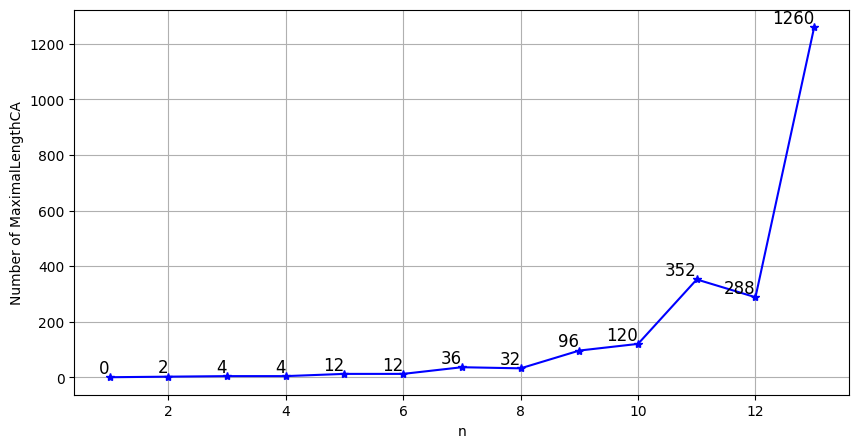

In [77]:
indices = list(range(1,14))

plt.figure(figsize=(10, 5))
plt.plot(indices, res, marker='*', linestyle='-', color='b')
plt.xlabel('n')
plt.ylabel('Number of MaximalLengthCA')

for i, value in enumerate(res):
    plt.text(indices[i], value, str(value), fontsize=12, ha='right', va='bottom')
plt.grid(True)
plt.show()

A rule R : $ (0, 1)^3 → (0, 1) $ is linear if R(x, y, z) = ax + dy + bz (mod 2) for some constants a, d, b ∈ {0, 1}. Following this definition, rule 90 and 150 are linear and can be expressed as $(x+z) mod 2$ and $(x+y+z) mod 2$ respectively. The linear rules can be characterised by matrix algebra. We can define a matrix T, which is a tridiagonal matrix where the main,
upper and lower diagonal can only be non zero.

In [3]:
import numpy as np
def Tmatrix(rule_vec):
    n = len(rule_vec)
    square_array = np.zeros((n, n))

    for i in range(1,n):
        square_array[i][i-1] = 1
        square_array[i-1][i] = 1
    for i in range(n):
        square_array[i][i] = (rule_vec[i] - 90)//60    # 0 for rule 90 and 1 for rule 150 

    return square_array.astype(int)


In [4]:
Tmatrix([90,90,150,90])

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 1, 1],
       [0, 0, 1, 0]])

# Characteristics Polynomials for 90-150 CAs

The following code generate the characteristics polynomial for 90-150 CAs. It is based on the recurrence relation,

$Δ_-1 = 1$

$Δ_0 = (x + d_0)$

$Δ_1 = (x + d_1)Δ_0 + Δ_-1$

.
.
.

$Δ_k = (x + d_k)Δ_{k−1} + Δ_{k−2}$

.
.
.

$Δ = Δ_{n−1} = (x + d_{n−1})Δ_{n−2} + Δ_{n−3}$

The coefficient d is the main diagonal elements of the characterization matrix $[T]_{n×n}$. It is 0 for a cell following rule 90 and 1 for a cell following rule 150.

The polynomial can be of three types: Reducible, Irreducible and Primitive







In [174]:
from sympy import symbols,expand, GF, Poly

# input rule_vec as a binary array where 0 is for index following rule 90 and 1 for index following rule 150

def GenerateCharacteristicsPoly(rule_vec):

    x = symbols('x')
    n = len(rule_vec)

    # helper function for polynomial over GF(2)
    convert_to_gf2 = lambda poly: sum(coeff * symbols('x')**i for i, coeff in enumerate(reversed(Poly(poly, symbols('x')).set_domain('GF(2)').all_coeffs())))

    p_array = [1, x + rule_vec[0]]

    for i in range(2,n+1):
        curr = expand((x+rule_vec[i-1])*p_array[-1])
        p_array.append(convert_to_gf2(curr + p_array[-2]))

    for i in p_array:
        print(i)

    return p_array[-1]

In [175]:
GenerateCharacteristicsPoly([0,1,0,0])

1
x
x**2 + x + 1
x**3 + x**2
x**4 + x**3 + x**2 + x + 1


x**4 + x**3 + x**2 + x + 1

In those three types, only the the primitive polynomials belongs to maximal length CA. The following code define a function that takes rule-vectors in form of binary array as input and return the validation that if the characteristics polynomial is primitive or not. A  polynomial over $GF(2)$ of degree $n$ is primitive if it is irreducible and can divide a polynomial $x^m + 1$ where m is 1 less than tha square of the degree, $D$ of the polynomial i.e, $m = D^2-1$ 

A polynomial over $GF(2)$, in layman terms, is a polynomial with coefficients as $1$ for all the terms. 

A nonzero polynomial $P(x)$ over $GF(q)$ is said to be irreducible if it
cannot be factored into two non-constant polynomials $G(x)$ and $H(x)$ over the same
field, that is, $P(x) \neq G(x) × H(x)$; otherwise, it is reducible.

In [186]:
from sympy import symbols, GF, Poly

def checkPrimitive(rule_vec):
    
    x = symbols('x')
    poly = suppress_print(GenerateCharacteristicsPoly,rule_vec)
    print(poly)
    poly = Poly(poly, x,modulus=2)
    mod_poly = Poly(x**(poly.degree()**2-1)+1, x, modulus = 2)
    return mod_poly % poly == 0


In [187]:
checkPrimitive([1,1,0,1])

x**4 + x**3 + 1


True

We will see the irreducibility of characteristics polynomial determined by Rabin's Test. The below code use a framework 'galois' for checking the type of polynomial.

In [54]:
from sympy import symbols, Poly
import galois, numpy

def CharacteristicsPoly(rule_vec, p):
    x = symbols('x')
    n = len(rule_vec)
    
    # the coefficients d based on rule vector, 0 for 90 and 1 for 150
    rule_vec = [int((i - 90) / 60) for i in rule_vec]

    # Initialize the polynomial array with the first two polynomials
    p_array = [1, [ 1 , rule_vec[0]]]

    # Apply the recurrence relation to find the characteristic polynomial
    for i in range(2, n + 1):
        curr = numpy.polymul([1 , rule_vec[i - 1]],p_array[-1])
        p_array.append(numpy.polyadd(curr,p_array[-2]) % p)              # operations in GF(2)

    char_poly = Poly(p_array[-1],x)
    print('The characteristic polynomial is', char_poly)

    GF = galois.GF(p)
    poly = galois.Poly(p_array[-1], field=GF)

    # Use galois methods to check the type of characteristic polynomials
    if poly.is_primitive():
        return 'primitive, thus rule vector produce MLCA'
    elif poly.is_irreducible():
        return 'irreducible and thus not MLCA'
    else:
        return 'reducible and thus not MLCA'

In [57]:
print(CharacteristicsPoly([150,150,90,150],5))

print(CharacteristicsPoly([150,150,90,150,90],5))

The characteristic polynomial is Poly(x**4 + 3*x**3 + x**2 + x + 3, x, domain='ZZ')
reducible and thus not MLCA
The characteristic polynomial is Poly(x**5 + 3*x**4 + 2*x**3 + 3*x**2 + x + 1, x, domain='ZZ')
irreducible and thus not MLCA


Given a matrix, the following code calculates the characteristics polynomial.

In [ ]:


import sympy as sp

def characteristic_polynomial(matrix):
    x = sp.symbols('x')
    identity_matrix = sp.eye(matrix.shape[0])
    characteristic_poly = sp.det(matrix + x * identity_matrix)
    return sp.simplify(characteristic_poly)

# Example usage
A = sp.Matrix([[2, 0, 1],
               [0, 1, 1],
               [1, 1, 0]])

char_poly = characteristic_polynomial(A)
print("Characteristic polynomial:", char_poly)


Characteristic polynomial: x**3 + 3*x**2 - 3


# Rabin's Irreducibility Test 

In [ ]:
from sympy import symbols, gcd, Poly, GF  # import mod,div if needed
from sympy.ntheory.factor_ import factorint

def irreducibility_test(f, q):
    x = symbols('x')
    n = f.degree()
    # Find all distinct prime divisors of n
    prime_divisors = list(factorint(n).keys())
    
    for p in prime_divisors:
        n_j = n // p
        h = x**(q**n_j) - x
        h_mod_f = Poly(h, x, domain=f.domain).rem(f)
        g = gcd(f, h_mod_f)
        if g != 1:
            return "f is reducible"
    
    g = x**(q**n) - x
    g_mod_f = Poly(g, x, domain=f.domain).rem(f)
    if g_mod_f == 0:
        return "f is irreducible"
    else:
        return "f is reducible"

# Example usage
# Define the polynomial ring over a finite field (example: F_5[x])
Fq = GF(5)

# Define the polynomial f in F_5[x]
x = symbols('x')
f = Poly(x**3 + 2*x**2 + x + 4, x, domain=Fq)

# Define the degree of the polynomial
n = f.degree()

# Compute the irreducibility test
result = irreducibility_test(f, Fq.characteristic())
print(result)


f is irreducible


Generating Matrix from Linear Rules vector. The linear rules are:

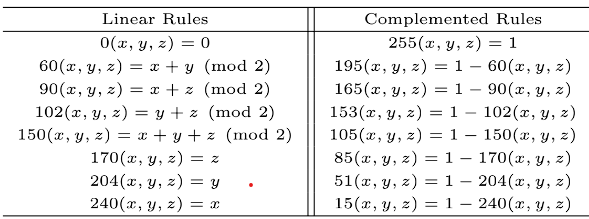

In [3]:
import numpy as np
import sympy as sp

def GenMatrix(rule_vec):
    n = len(rule_vec)
    mat = np.zeros((n, n), dtype=int)
    x = sp.symbols('x')
    I = sp.eye(n)

    class Linear_Rule:
        def attonator(self, rule, mat, k):
            return getattr(self, 'ret' + str(rule), self.default)(mat, k)

        def default(self, mat, k):
            pass

        def ret0(self, mat, k):
            mat[k][(k-1)%n] = 0
            mat[k][k] = 0
            mat[k][(k+1)%n] = 0

        def ret60(self, mat, k):
            mat[k][(k-1)%n] = 1
            mat[k][k] = 0
            mat[k][(k+1)%n] = 0

        def ret90(self, mat, k):
            mat[k][(k-1)%n] = 1
            mat[k][k] = 0
            mat[k][(k+1)%n] = 1

        def ret102(self, mat, k):
            mat[k][(k-1)%n] = 0
            mat[k][k] = 1
            mat[k][(k+1)%n] = 1
        
        def ret150(self, mat, k):
            mat[k][(k-1)%n] = 1
            mat[k][k] = 1
            mat[k][(k+1)%n] = 1

        def ret170(self, mat, k):
            mat[k][(k-1)%n] = 0
            mat[k][k] = 0
            mat[k][(k+1)%n] = 1

        def ret204(self, mat, k):
            mat[k][(k-1)%n] = 0
            mat[k][k] = 1
            mat[k][(k+1)%n] = 0

        def ret240(self, mat, k):
            mat[k][(k-1)%n] = 1
            mat[k][k] = 0
            mat[k][(k+1)%n] = 0

    my_switch = Linear_Rule()

    for i in range(n):
        my_switch.attonator(rule_vec[i], mat, i)

    mat[0][-1] = 0      # remove both line for periodic condition
    mat[-1][0] = 0

    T_minus_lambda_I = mat - x * I

    print(mat)
    
    return (sp.expand(sp.det(T_minus_lambda_I)))

    return mat


In [4]:
GenMatrix([90,150,150,150,90,150,150])

[[0 1 0 0 0 0 0]
 [1 1 1 0 0 0 0]
 [0 1 1 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 1 0]
 [0 0 0 0 1 1 1]
 [0 0 0 0 0 1 1]]


-x**7 + 5*x**6 - 4*x**5 - 11*x**4 + 12*x**3 + 6*x**2 - 5*x

The polynomial generated by a 90-150 rule vector is same as the polynomial generated by the reverse of the very rule vector. No other hybrid rule vector show this. 

In [ ]:
import numpy
from sympy import Poly, symbols, GF

def test1(rule_vec):

    def test(rule_vec1):

        x = symbols('x')
        
        rule_vec = [int(i) for i in rule_vec1]

        n = len(rule_vec)

        # Initialize the polynomial array with the first two polynomials
        p_array = [1, [ 1 , rule_vec[0]]]

        # Apply the recurrence relation to find the characteristic polynomial
        for i in range(2, n + 1):
            curr = numpy.polymul([1 , rule_vec[i - 1]],p_array[-1])
            p_array.append(numpy.polyadd(curr,p_array[-2]) % 2)              # operations in GF(2)

        return Poly(p_array[-1],x)
    
    
        
    return test(rule_vec)==test(rule_vec[::-1])

n = 18          # checked for all the cellular automata of length 1 to 17

for k in range(1,n):

    rules_vectors = [bin(i)[2:].zfill(k) for i in range(2**k) if bin(i)[2:].zfill(k) != bin(i)[2:].zfill(k)[::-1]]   # generate all the cellular automata

    for i in rules_vectors:
        if test1(i)==False:
            print('failed')

# As we see, no 'failed' is printed, thus the hypothesis is true

# the runtime of this code is 4 minutes


We will try to write quantum circuit for Rule 90 and Rule 150. 

Rule 150 works on x⊕y⊕z mod 2. 

Rule 90 works on x⊕z mod 2 which is equal to x⊕y⊕z⊕y mod 2

In [1]:
import pennylane as qml
from pennylane import numpy as np


# Define the device with 1024 shots
dev = qml.device('default.qubit', wires=3, shots=1)

# Define the quantum circuit
@qml.qnode(dev)
def Rule_150(arr):
    if arr[0] == '1':
     
        qml.PauliX(wires=0)
    if arr[1] == '1':
        qml.PauliX(wires=1)
    if arr[2] == '1':
        qml.PauliX(wires=2)  # Initialize qubit 0 to |1>
    qml.CNOT(wires=[0, 2]) 
    qml.CNOT(wires=[2, 1])  # Apply the CNOT gate
    return qml.sample(wires=[0, 1, 2])  # Return the probabilities of the states

@qml.qnode(dev)
def Rule_90(arr):
    if arr[0] == '1':
        qml.PauliX(wires=0)
    if arr[1] == '1':
        qml.PauliX(wires=1)
        qml.PauliX(wires=3)
    if arr[2] == '1':
        qml.PauliX(wires=2)  # Initialize qubit 0 to |1>
    qml.CNOT(wires=[0, 1]) 
    qml.CNOT(wires=[2, 1])  # Apply the CNOT gate
    qml.CNOT(wires=[3, 1])
    return qml.sample(wires=[0, 1, 2, 3])  # Return the probabilities of the states


for i in [format(i, f'0{3}b') for i in range(2**3)]:

# Run the circuit and get the result
    print(Rule_150(i))




[0 0 0]
[0 1 1]
[0 1 0]
[0 0 1]
[1 1 1]
[1 0 0]
[1 0 1]
[1 1 0]
